# Investigating the high-metallicity tail of the low-$\alpha$ sequence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from apogee_sample import APOGEESample
from multizone_stars import MultizoneStars
import paths
from utils import get_bin_centers, get_color_list

## APOGEE

In [2]:
plt.style.use(paths.styles / 'paper.mplstyle')
full_sample = APOGEESample.load()
local_sample = full_sample.region(galr_lim=(7, 9), absz_lim=(0, 2))

Abundance diagram inset

In [3]:
inset_extent = [0.1, 0.4, -0.05, 0.15]

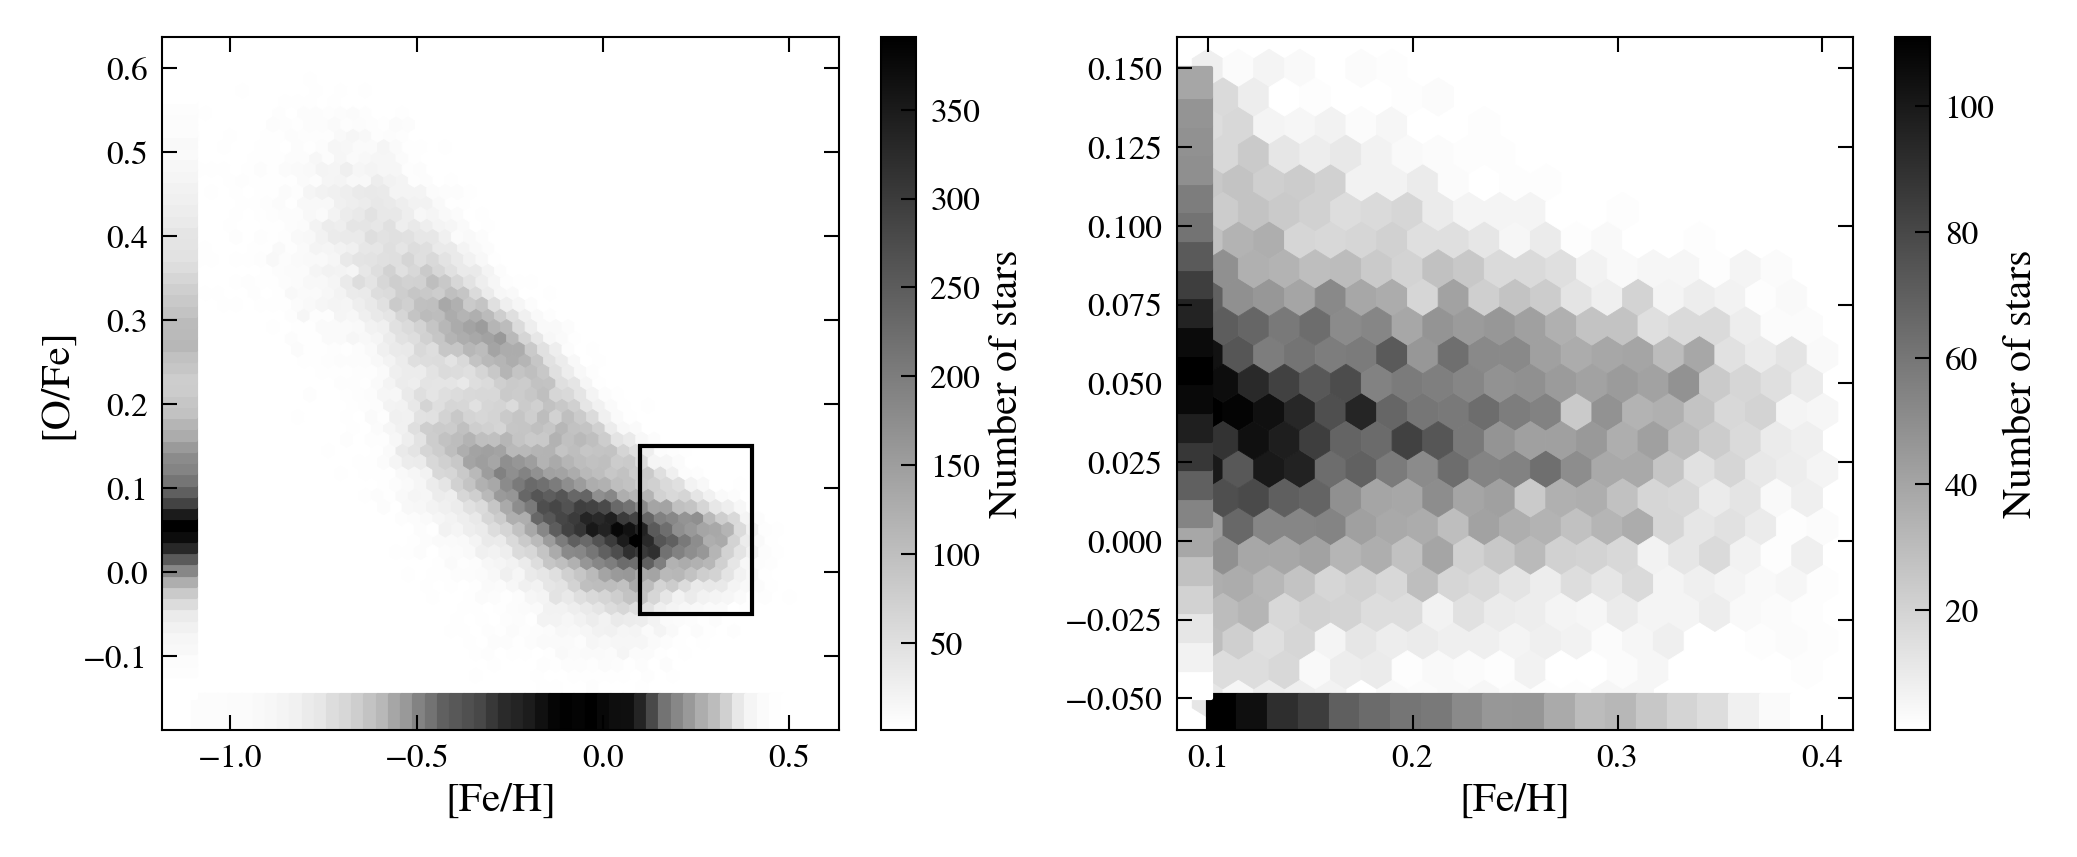

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
# Full abundance plot
pcm0 = axs[0].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=np.ones(local_sample.nstars),
    reduce_C_function=np.sum,
    gridsize=50, cmap='binary', linewidths=0.2,
    extent=[-1.1, 0.55, -0.15, 0.6],
    marginals=True
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
# Zoom-in
pcm1 = axs[1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=np.ones(local_sample.nstars),
    reduce_C_function=np.sum,
    gridsize=20, cmap='binary', linewidths=0.2,
    extent=inset_extent,
    marginals=True
)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

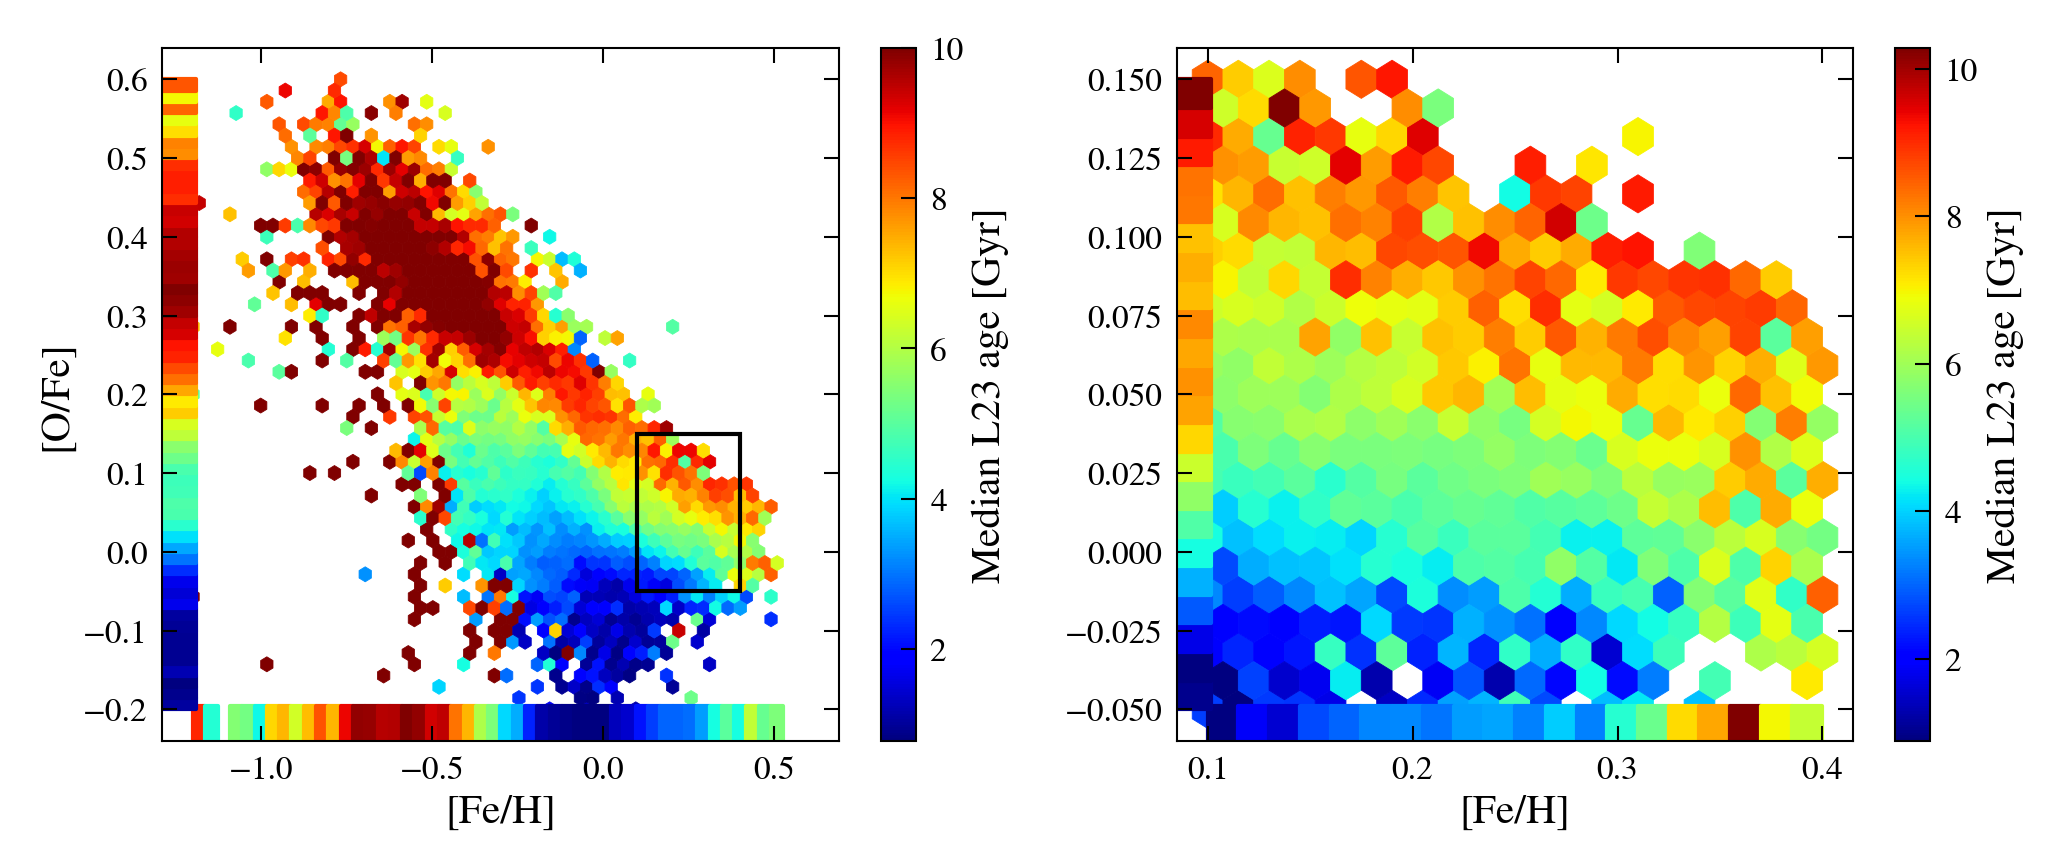

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
cmap = 'jet'
# Full abundance plot
pcm0 = axs[0].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('L23_AGE'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.2, 0.6],
    marginals=True, vmax=10
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Median L23 age [Gyr]')
# Zoom-in
pcm1 = axs[1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('L23_AGE'),
    reduce_C_function=np.median,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True
)
# pc1 = axs[1].scatter(
#     local_sample('FE_H'), local_sample('O_FE'),
#     c=local_sample('L23_AGE'),
#     vmax=9,
#     s=10, marker='.', cmap=cmap
# )
# axs[1].set_xlim((0.2, 0.5))
# axs[1].set_ylim((-0.05, 0.15))
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Median L23 age [Gyr]')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

Median age vs [O/Fe] for mono-metallicity bins

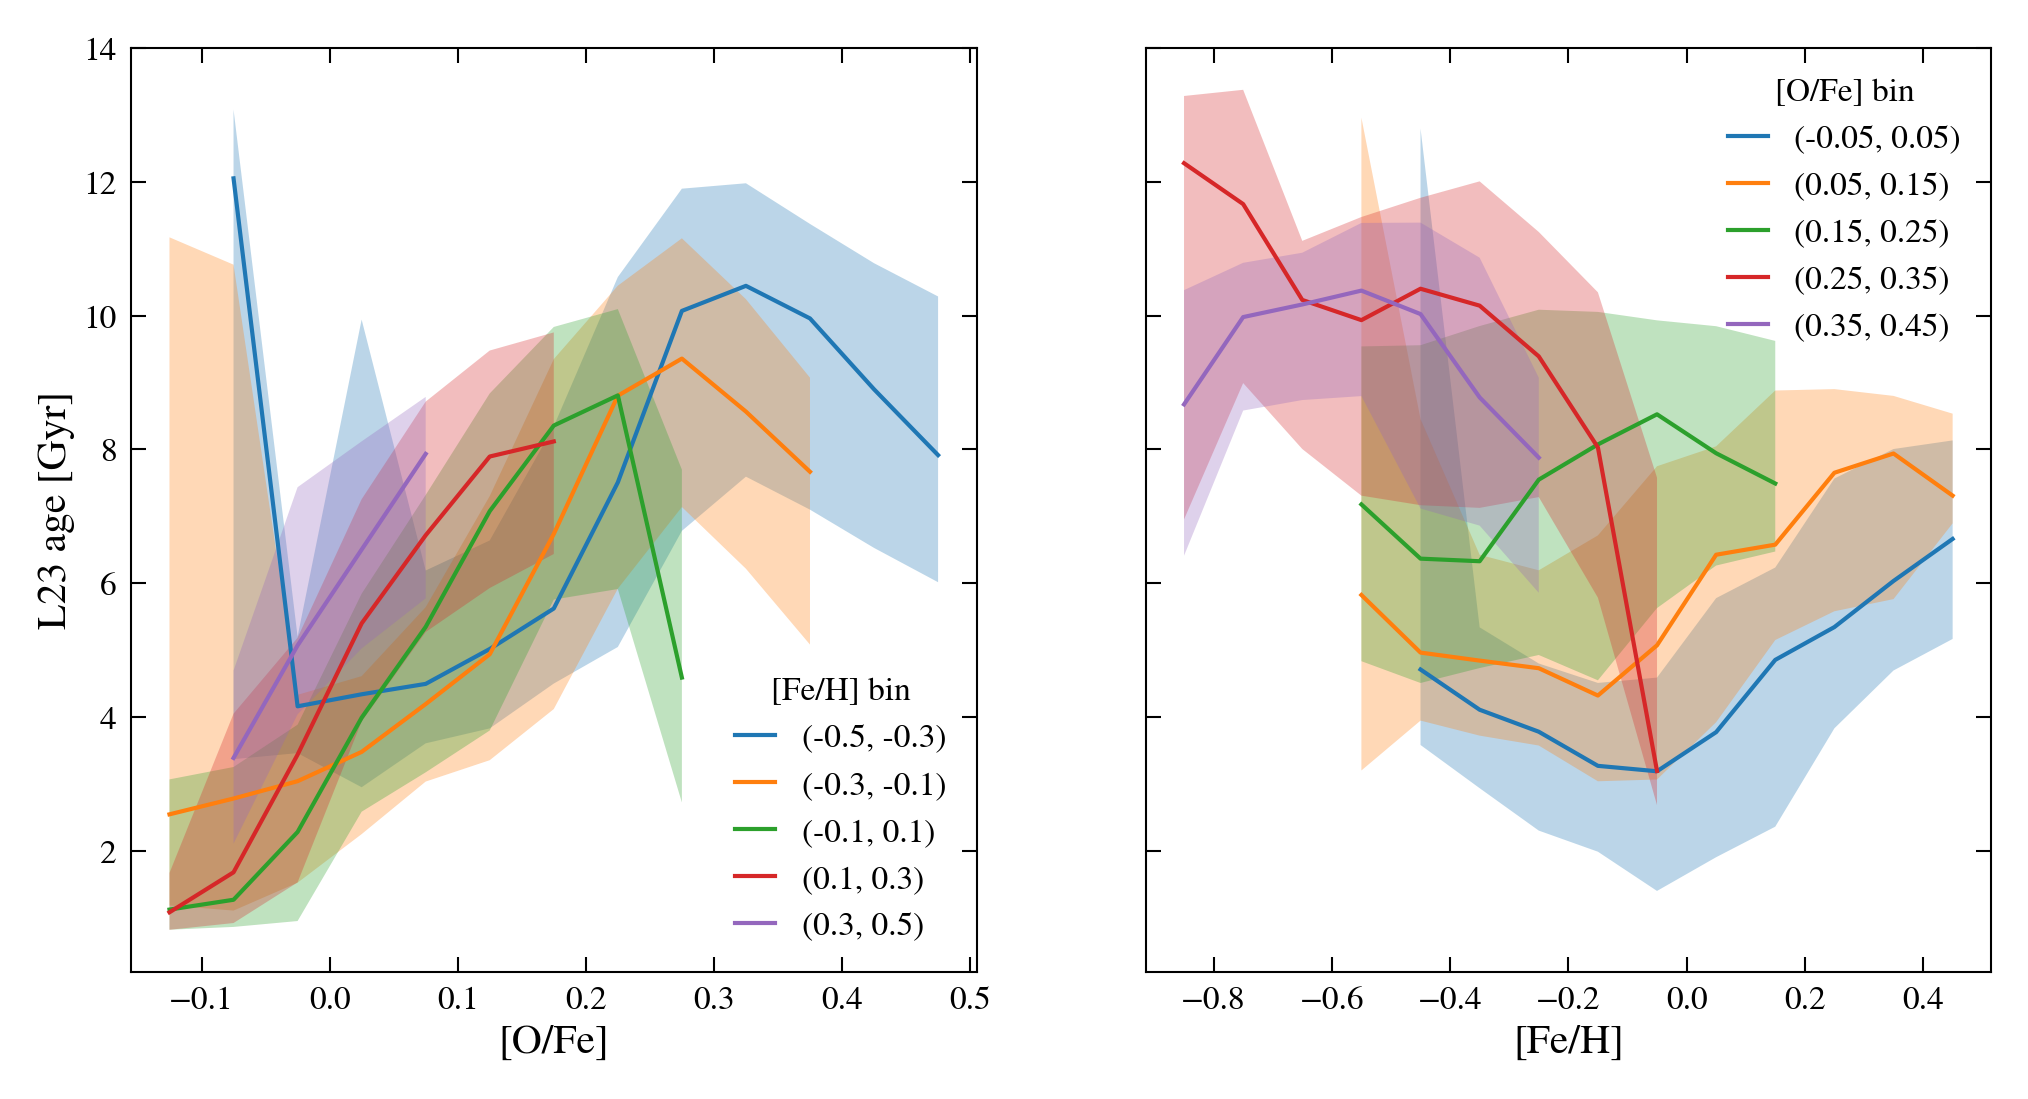

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
oh_bins = np.arange(-0.5, 0.7, 0.2)
ofe_bins = np.arange(-0.15, 0.6, 0.05)
min_counts = 10 # threshold number of counts per bin for plotting
for i in range(len(oh_bins)-1):
    oh_lim = tuple(oh_bins[i:i+2])
    mono_z_pop = local_sample.filter({'FE_H': oh_lim})
    age_intervals = mono_z_pop.binned_intervals('L23_AGE', 'O_FE', ofe_bins)
    age_intervals[age_intervals['count'] < min_counts] = np.nan
    axs[0].fill_between(get_bin_centers(ofe_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    axs[0].plot(get_bin_centers(ofe_bins), age_intervals[0.5], 
            label=f'({round(oh_lim[0], 2)}, {round(oh_lim[1], 2)})')
# plot age vs [fe/h] in bins of [o/fe]
oh_bins = np.arange(-0.9, 0.7, 0.1)
ofe_bins = np.arange(-0.05, 0.5, 0.1)
for i in range(len(ofe_bins)-1):
    ofe_lim = tuple(ofe_bins[i:i+2])
    mono_z_pop = local_sample.filter({'O_FE': ofe_lim})
    age_intervals = mono_z_pop.binned_intervals('L23_AGE', 'FE_H', oh_bins)
    age_intervals[age_intervals['count'] < min_counts] = np.nan
    axs[1].fill_between(get_bin_centers(oh_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    axs[1].plot(get_bin_centers(oh_bins), age_intervals[0.5], 
            label=f'({round(ofe_lim[0], 2)}, {round(ofe_lim[1], 2)})')
axs[0].set_xlabel('[O/Fe]')
axs[0].set_ylabel('L23 age [Gyr]')
axs[0].legend(title='[Fe/H] bin')
axs[1].set_xlabel('[Fe/H]')
axs[1].legend(title='[O/Fe] bin')
plt.show()

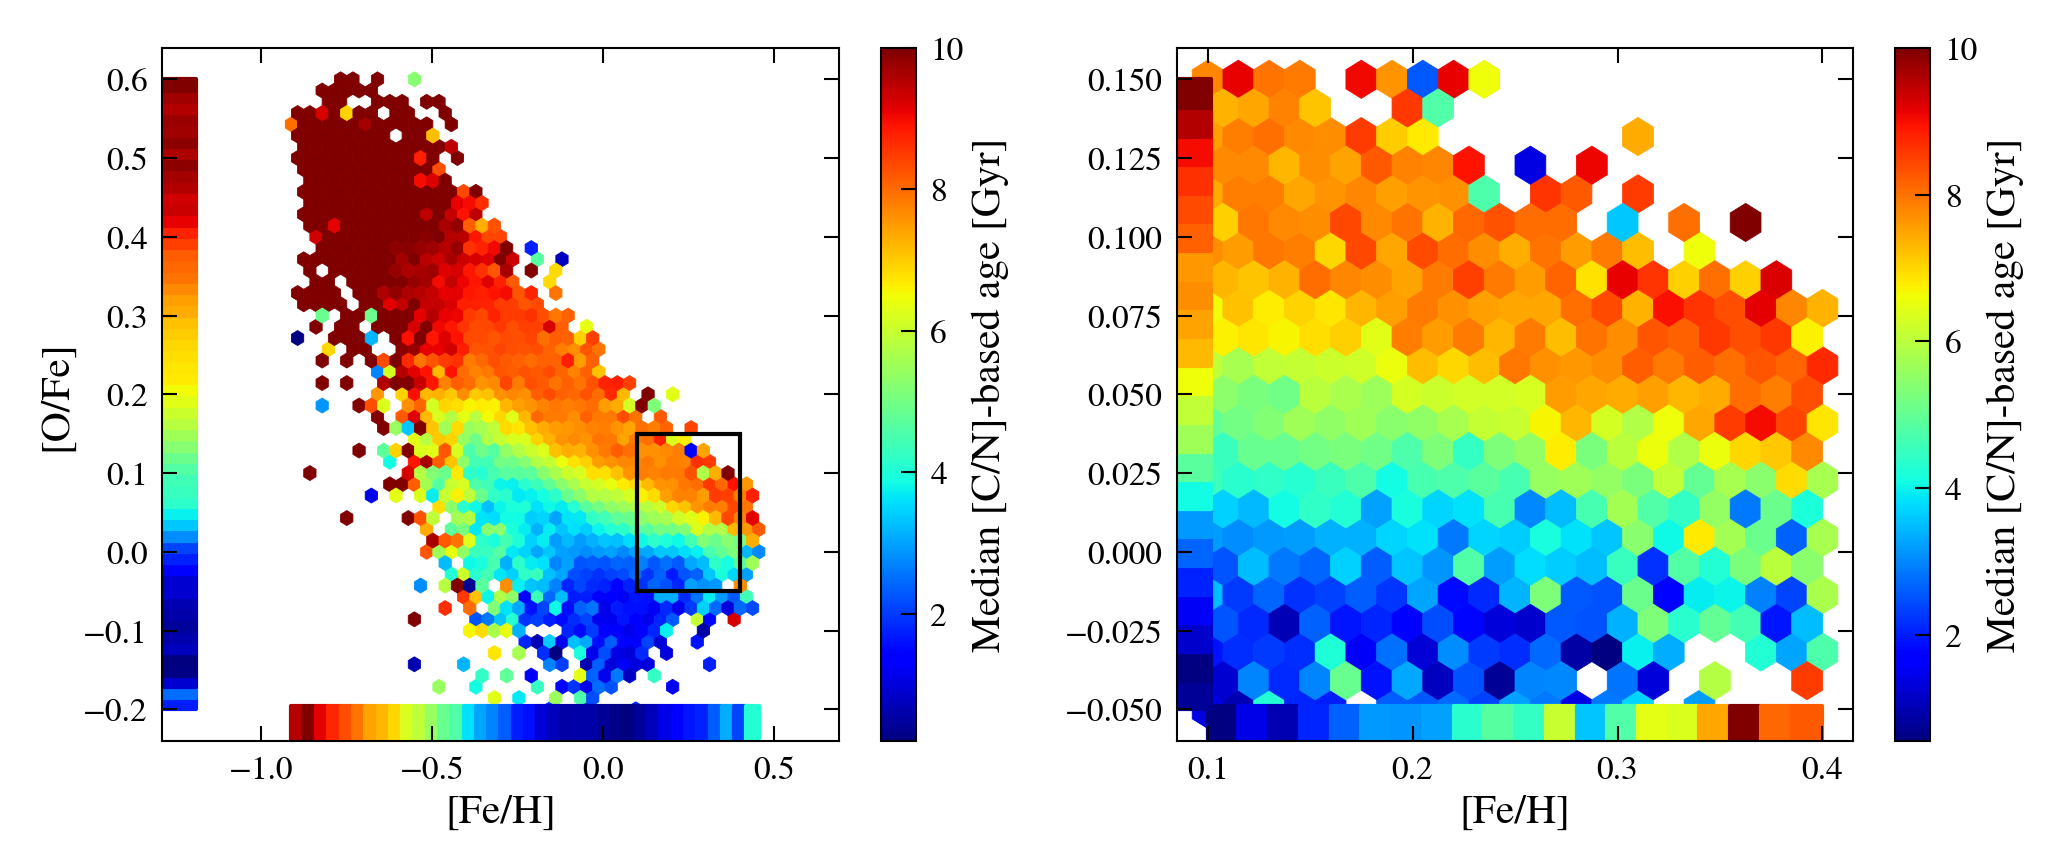

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
cmap = 'jet'
# Full abundance plot
pcm0 = axs[0].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('CN_AGE'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.2, 0.6],
    marginals=True, vmax=10
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Median [C/N]-based age [Gyr]')
# Zoom-in
pcm1 = axs[1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('CN_AGE'),
    reduce_C_function=np.median,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True, vmax=10
)
# pc1 = axs[1].scatter(
#     local_sample('FE_H'), local_sample('O_FE'),
#     c=local_sample('L23_AGE'),
#     vmax=9,
#     s=10, marker='.', cmap=cmap
# )
# axs[1].set_xlim((0.2, 0.5))
# axs[1].set_ylim((-0.05, 0.15))
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Median [C/N]-based age [Gyr]')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

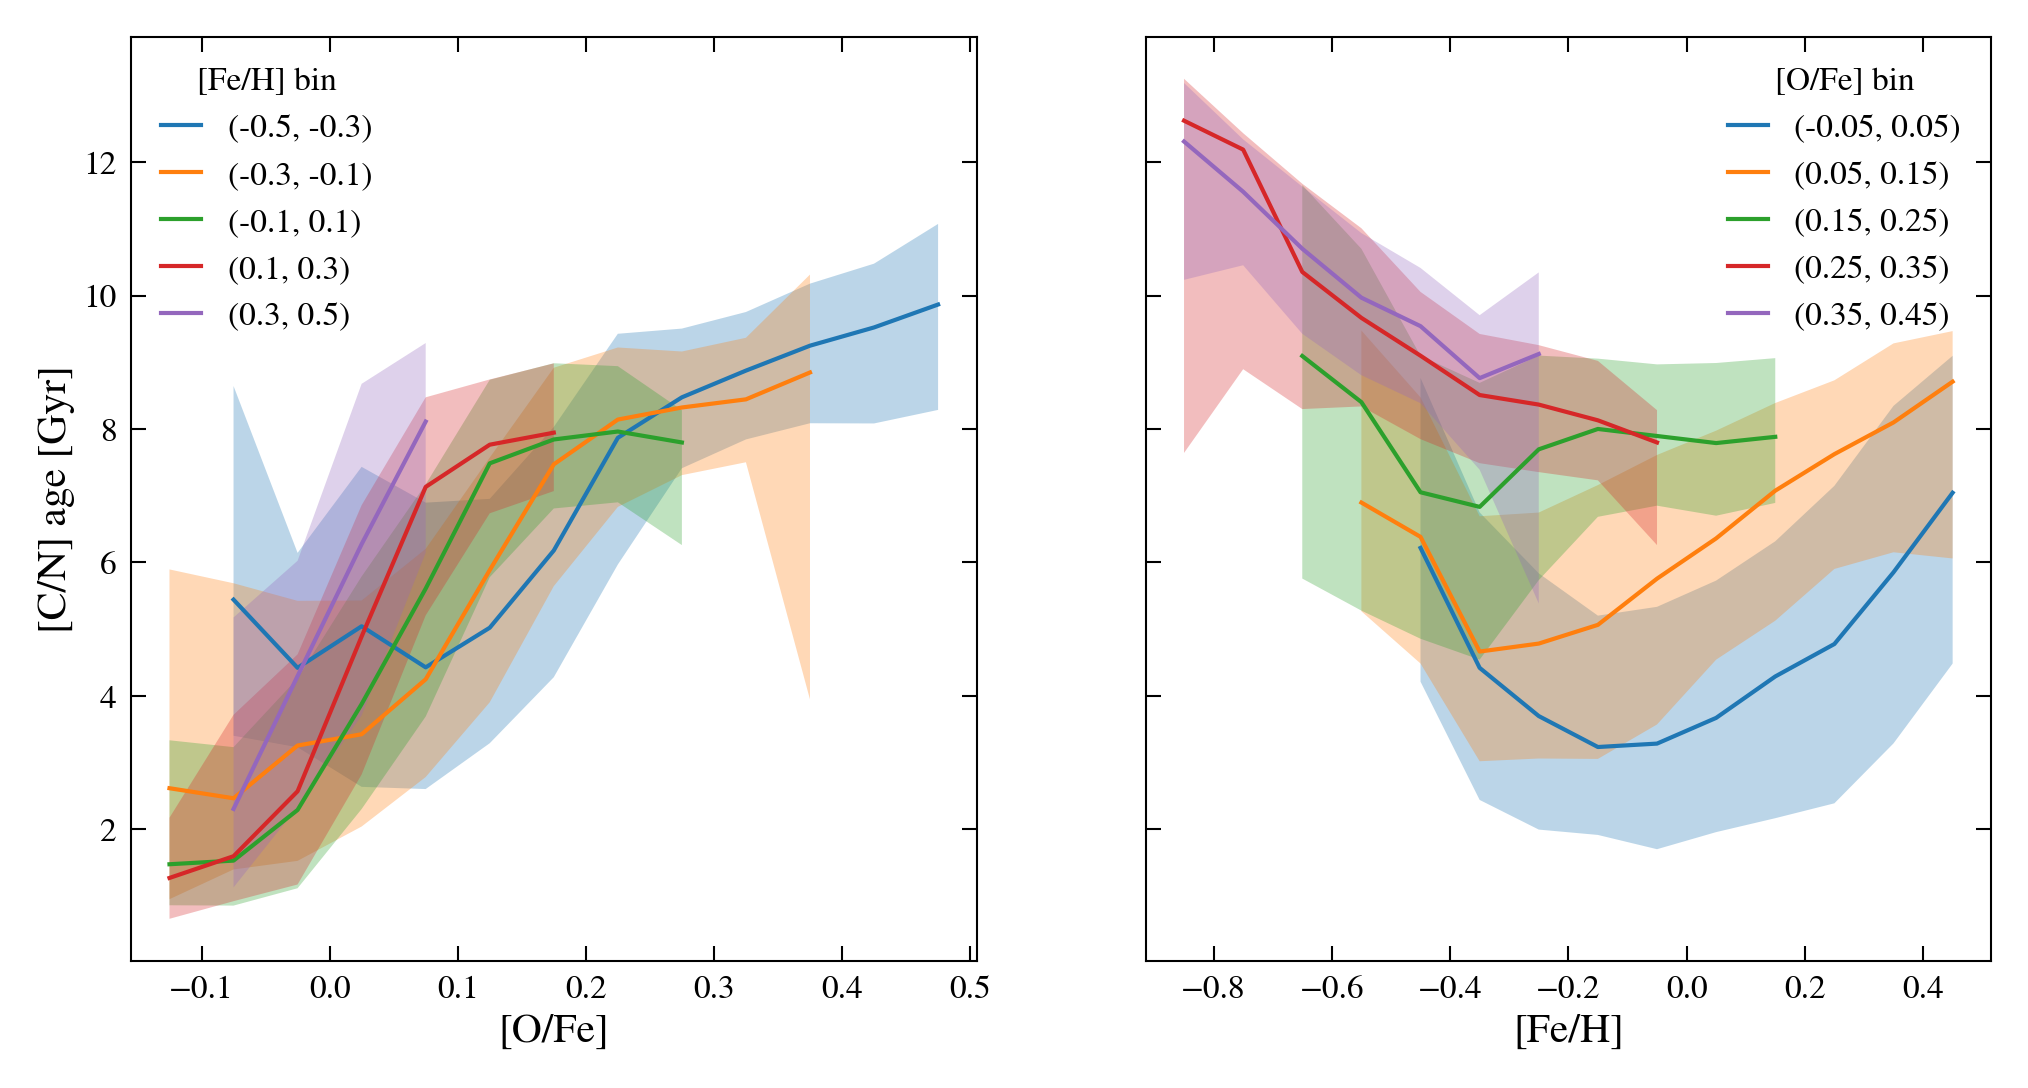

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
oh_bins = np.arange(-0.5, 0.7, 0.2)
ofe_bins = np.arange(-0.15, 0.6, 0.05)
min_counts = 10 # threshold number of counts per bin for plotting
for i in range(len(oh_bins)-1):
    oh_lim = tuple(oh_bins[i:i+2])
    mono_z_pop = local_sample.filter({'FE_H': oh_lim})
    age_intervals = mono_z_pop.binned_intervals('CN_AGE', 'O_FE', ofe_bins)
    age_intervals[age_intervals['count'] < min_counts] = np.nan
    axs[0].fill_between(get_bin_centers(ofe_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    axs[0].plot(get_bin_centers(ofe_bins), age_intervals[0.5], 
            label=f'({round(oh_lim[0], 2)}, {round(oh_lim[1], 2)})')
# plot age vs [fe/h] in bins of [o/fe]
oh_bins = np.arange(-0.9, 0.7, 0.1)
ofe_bins = np.arange(-0.05, 0.5, 0.1)
for i in range(len(ofe_bins)-1):
    ofe_lim = tuple(ofe_bins[i:i+2])
    mono_z_pop = local_sample.filter({'O_FE': ofe_lim})
    age_intervals = mono_z_pop.binned_intervals('CN_AGE', 'FE_H', oh_bins)
    age_intervals[age_intervals['count'] < min_counts] = np.nan
    axs[1].fill_between(get_bin_centers(oh_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    axs[1].plot(get_bin_centers(oh_bins), age_intervals[0.5], 
            label=f'({round(ofe_lim[0], 2)}, {round(ofe_lim[1], 2)})')
axs[0].set_xlabel('[O/Fe]')
axs[0].set_ylabel('[C/N] age [Gyr]')
axs[0].legend(title='[Fe/H] bin')
axs[1].set_xlabel('[Fe/H]')
axs[1].legend(title='[O/Fe] bin')
plt.show()

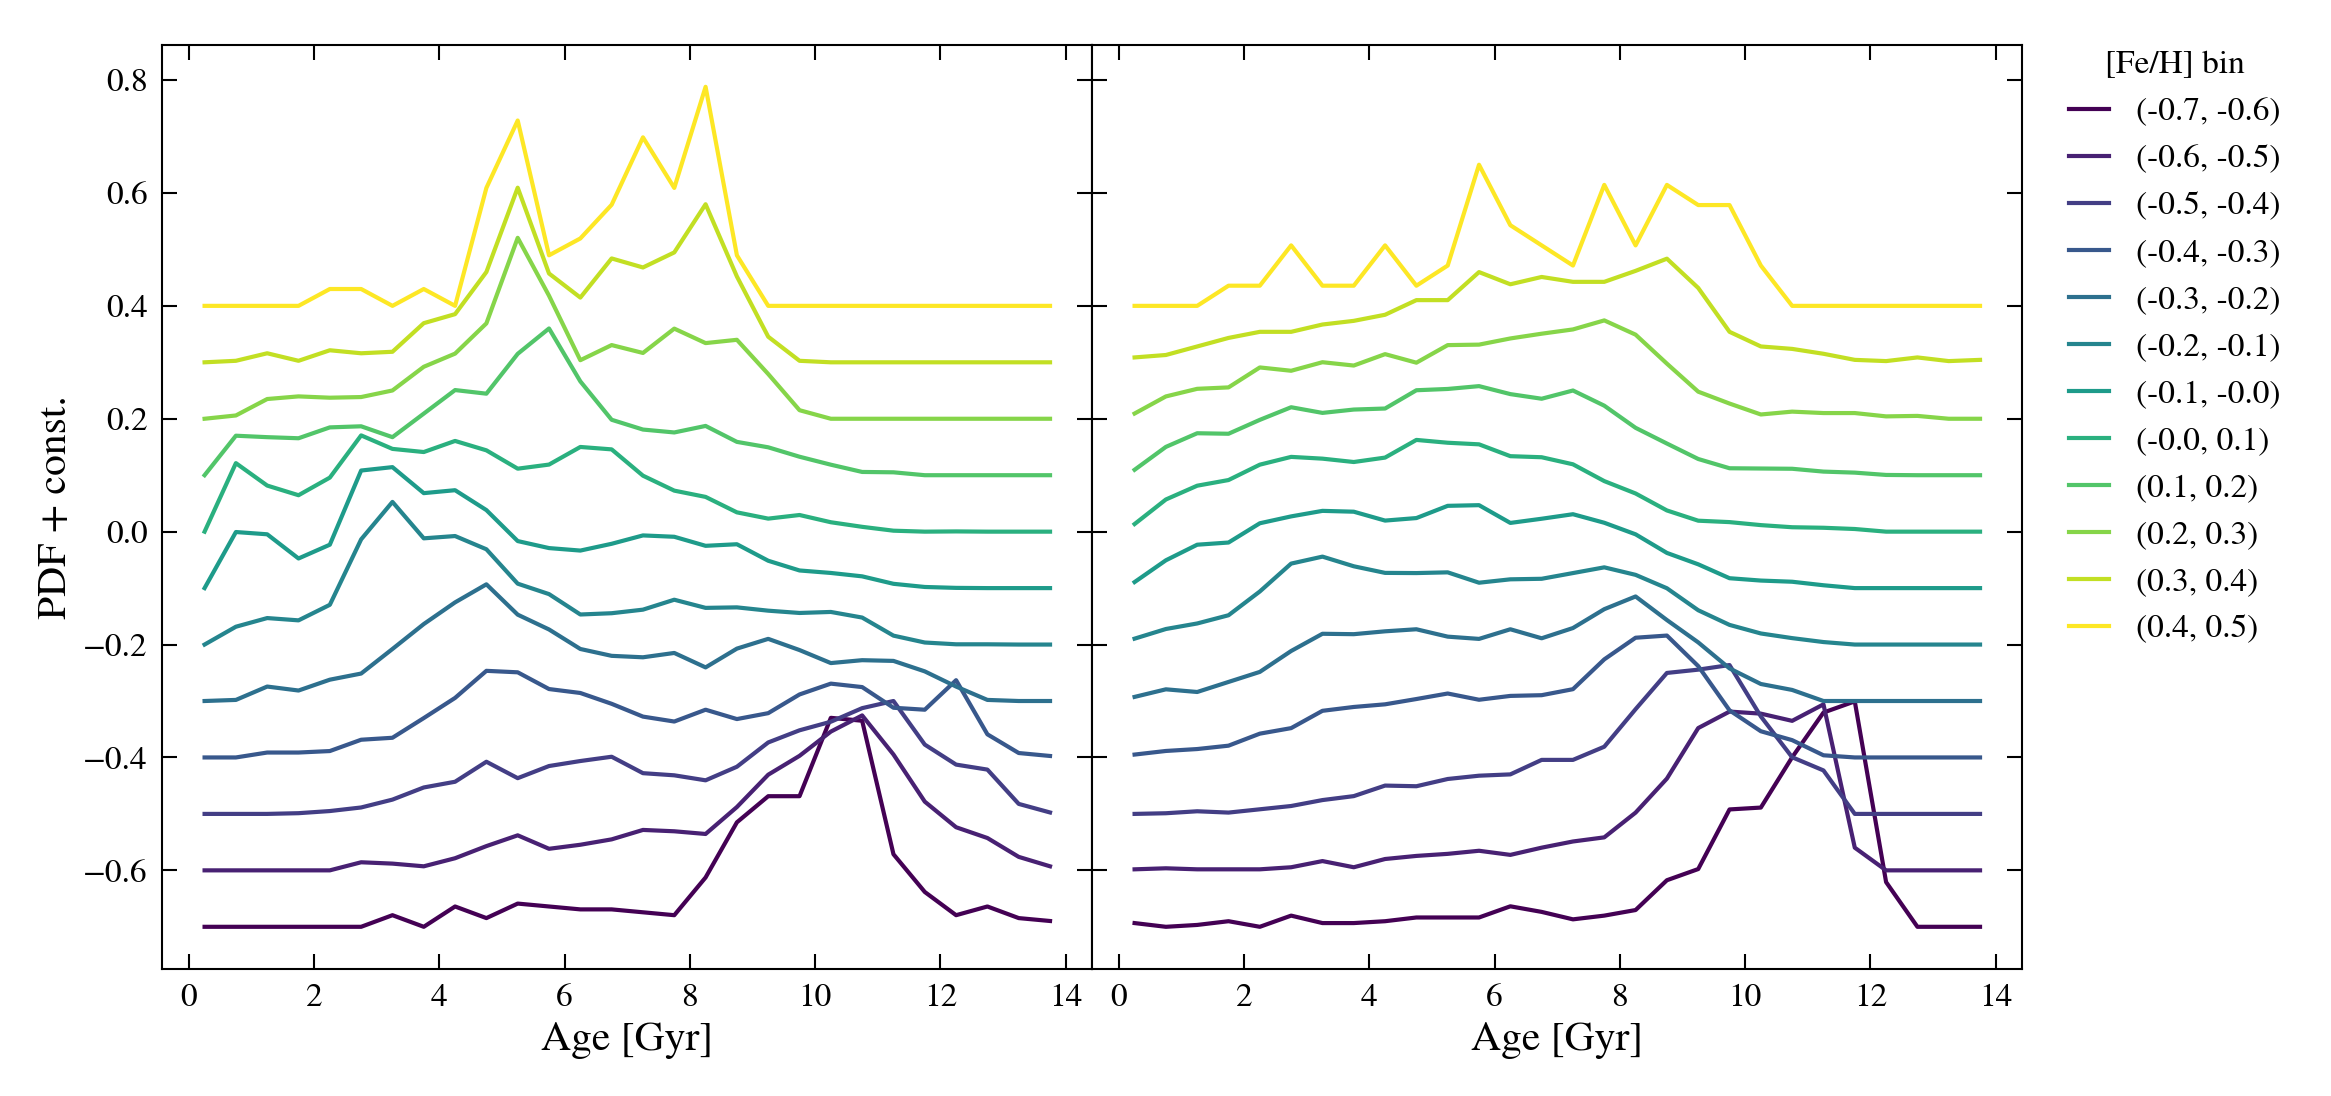

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True, gridspec_kw={'wspace': 0.})
feh_bins = np.arange(-0.7, 0.51, 0.1)
cmap = 'viridis'
colors = get_color_list(plt.get_cmap(cmap), feh_bins)
for i in range(len(feh_bins)-1):
    feh_lim = tuple(feh_bins[i:i+2])
    const = feh_lim[0]
    mono_feh_pop = local_sample.filter({'FE_H': feh_lim})
    adf_nn, age_bins = mono_feh_pop.mdf(col='L23_AGE', bins=28, range=(0, 14), smoothing=0.)
    axs[0].plot(get_bin_centers(age_bins), adf_nn+const, color=colors[i], 
                label=f'({round(feh_lim[0], 2)}, {round(feh_lim[1], 2)})')
    adf_cn, age_bins = mono_feh_pop.mdf(col='CN_AGE', bins=28, range=(0, 14), smoothing=0.)
    axs[1].plot(get_bin_centers(age_bins), adf_cn+const, color=colors[i])
fig.legend(loc='upper right', title='[Fe/H] bin', bbox_to_anchor=(1.02, 0.9))
axs[0].set_xlabel('Age [Gyr]')
axs[1].set_xlabel('Age [Gyr]')
axs[0].set_ylabel('PDF + const.')
plt.show()

Age distribution of the inset

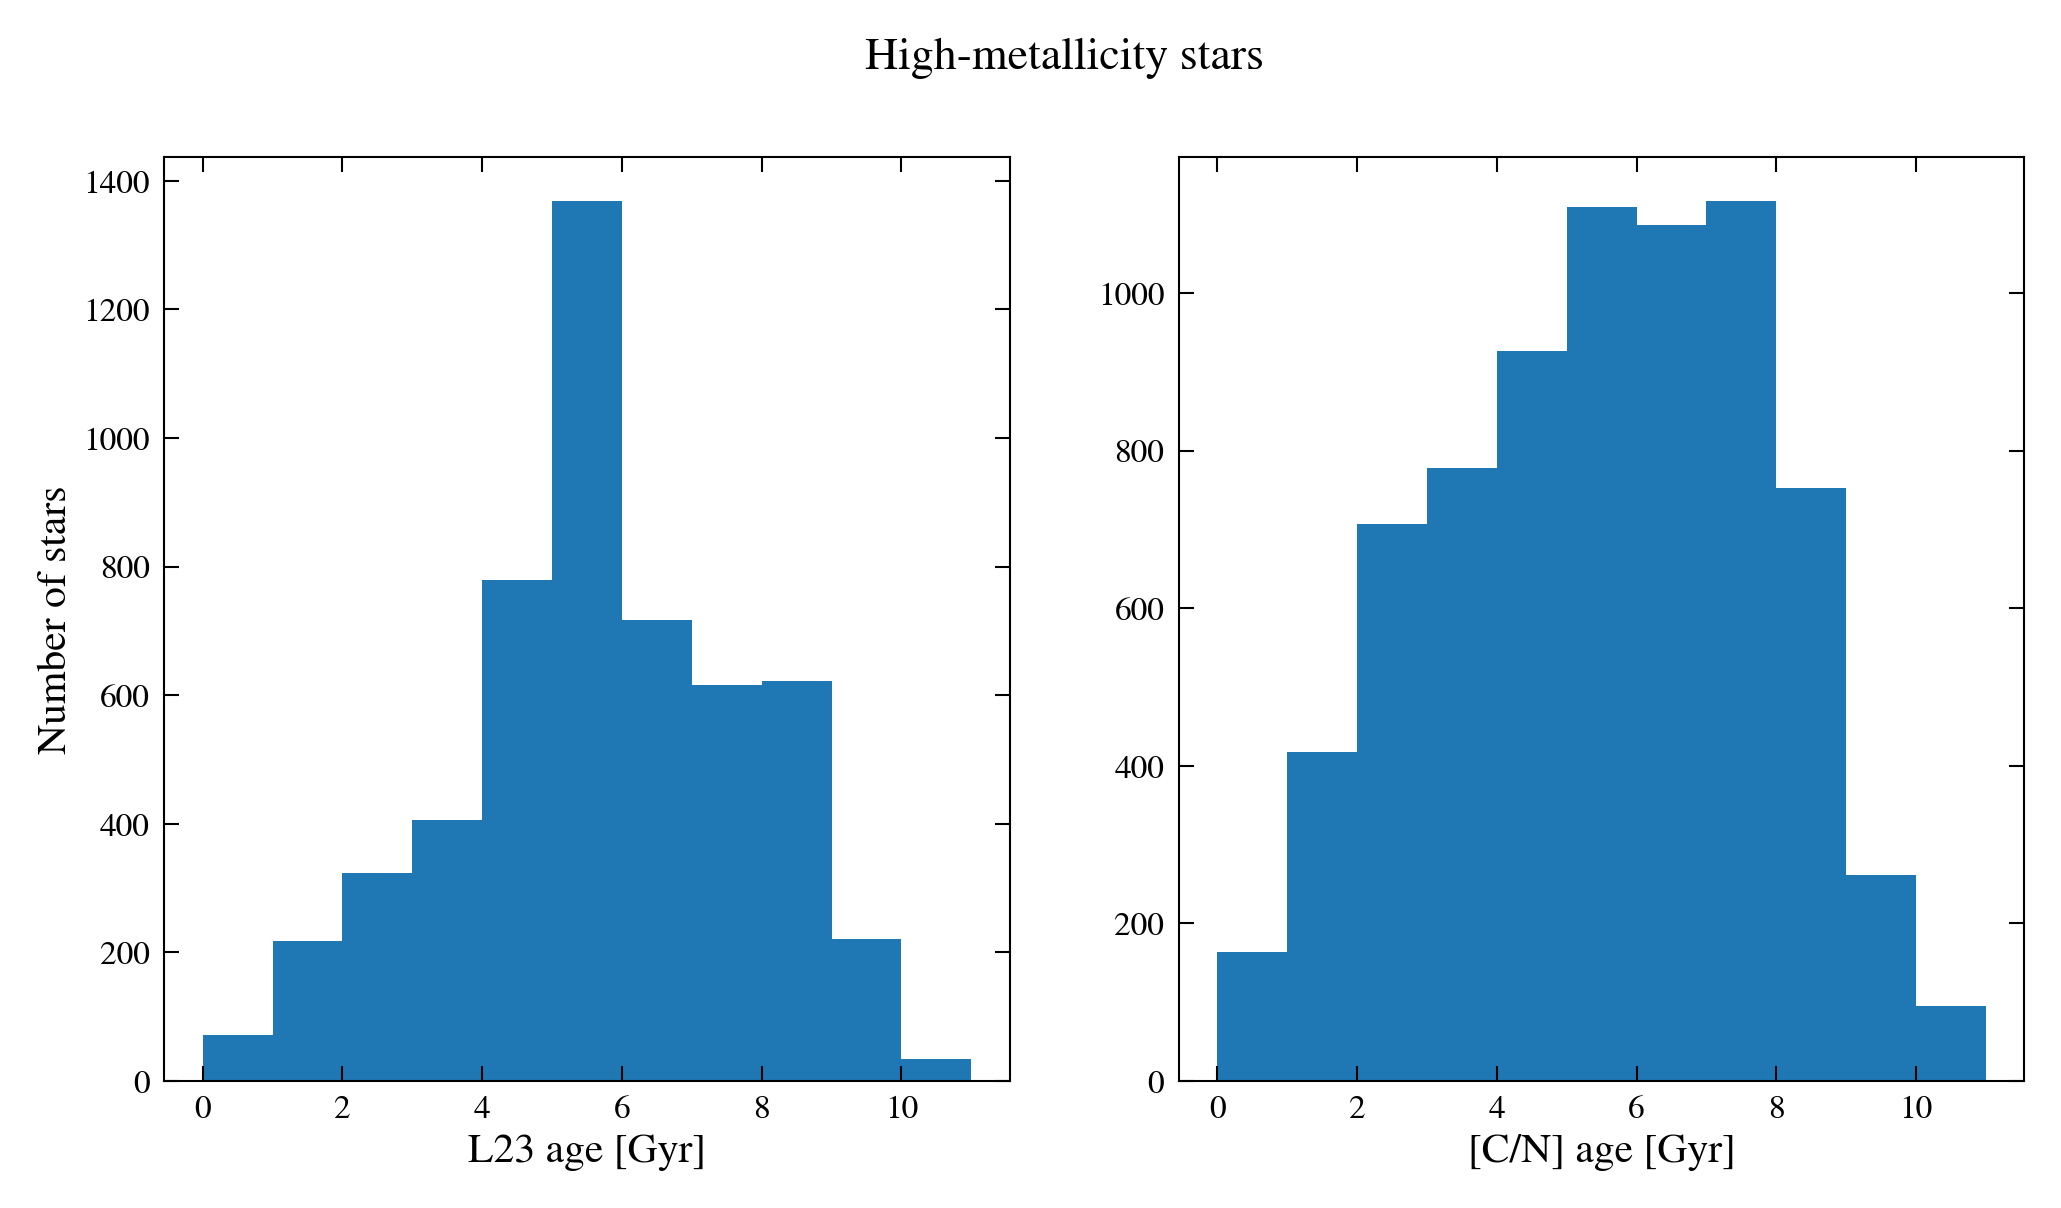

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
local_inset = local_sample.data[
    (local_sample.data['FE_H'] >= inset_extent[0]) &
    (local_sample.data['FE_H'] < inset_extent[1]) &
    (local_sample.data['O_FE'] >= inset_extent[2]) &
    (local_sample.data['O_FE'] < inset_extent[3])
].copy()
axs[0].hist(local_inset['L23_AGE'], bins=np.arange(0, 12, 1))
axs[1].hist(local_inset['CN_AGE'], bins=np.arange(0, 12, 1))
axs[0].set_xlabel('L23 age [Gyr]')
axs[1].set_xlabel('[C/N] age [Gyr]')
axs[0].set_ylabel('Number of stars')
fig.suptitle('High-metallicity stars')
plt.show()

## Multi-zone model (Two-infall)

In [11]:
mzs = MultizoneStars.from_output('yZ2/best/cgm07_ratio025/diskmodel')
mzs.model_uncertainty(full_sample.data, inplace=True)
mzs_local = mzs.region(galr_lim=(7, 9), absz_lim=(0, 2))

In [12]:
inset_extent = [0.1, 0.4, -0.05, 0.15]
cmap = 'Blues'

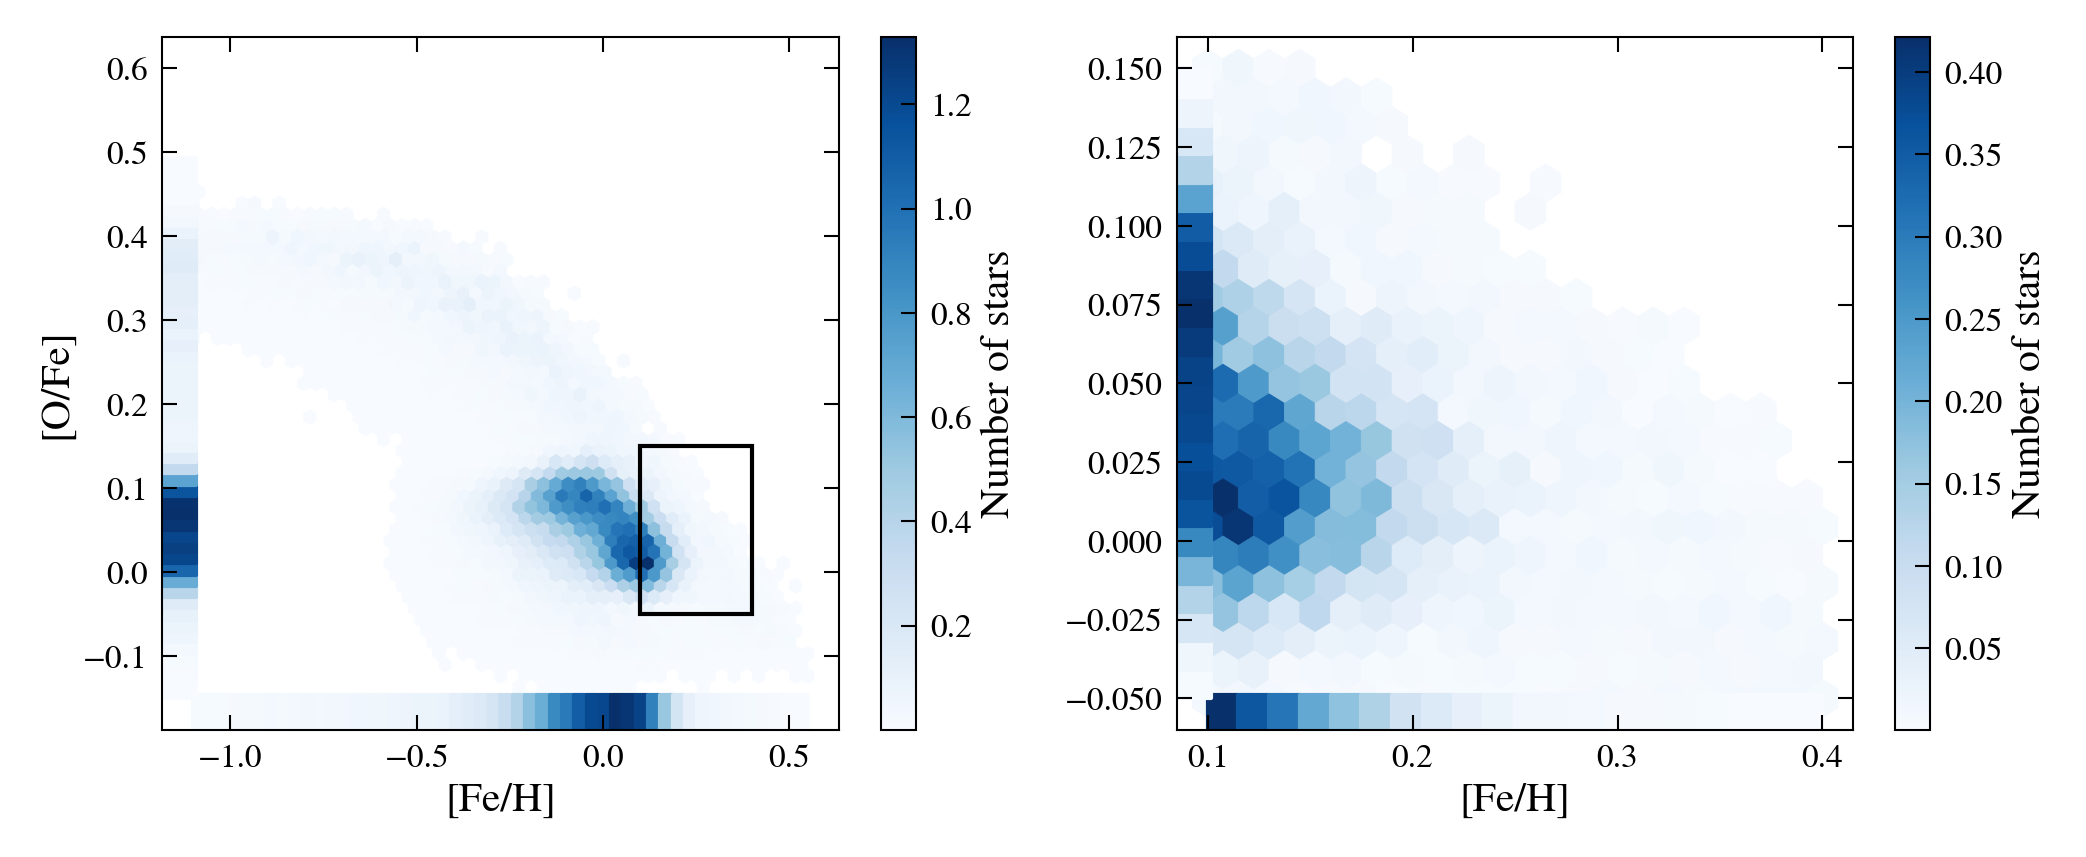

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
# Full abundance plot
pcm0 = axs[0].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=100 * mzs_local('mstar') / mzs_local('mstar').sum(),
    reduce_C_function=np.sum,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.1, 0.55, -0.15, 0.6],
    marginals=True
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
# Zoom-in
pcm1 = axs[1].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=100 * mzs_local('mstar') / mzs_local('mstar').sum(),
    reduce_C_function=np.sum,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True
)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

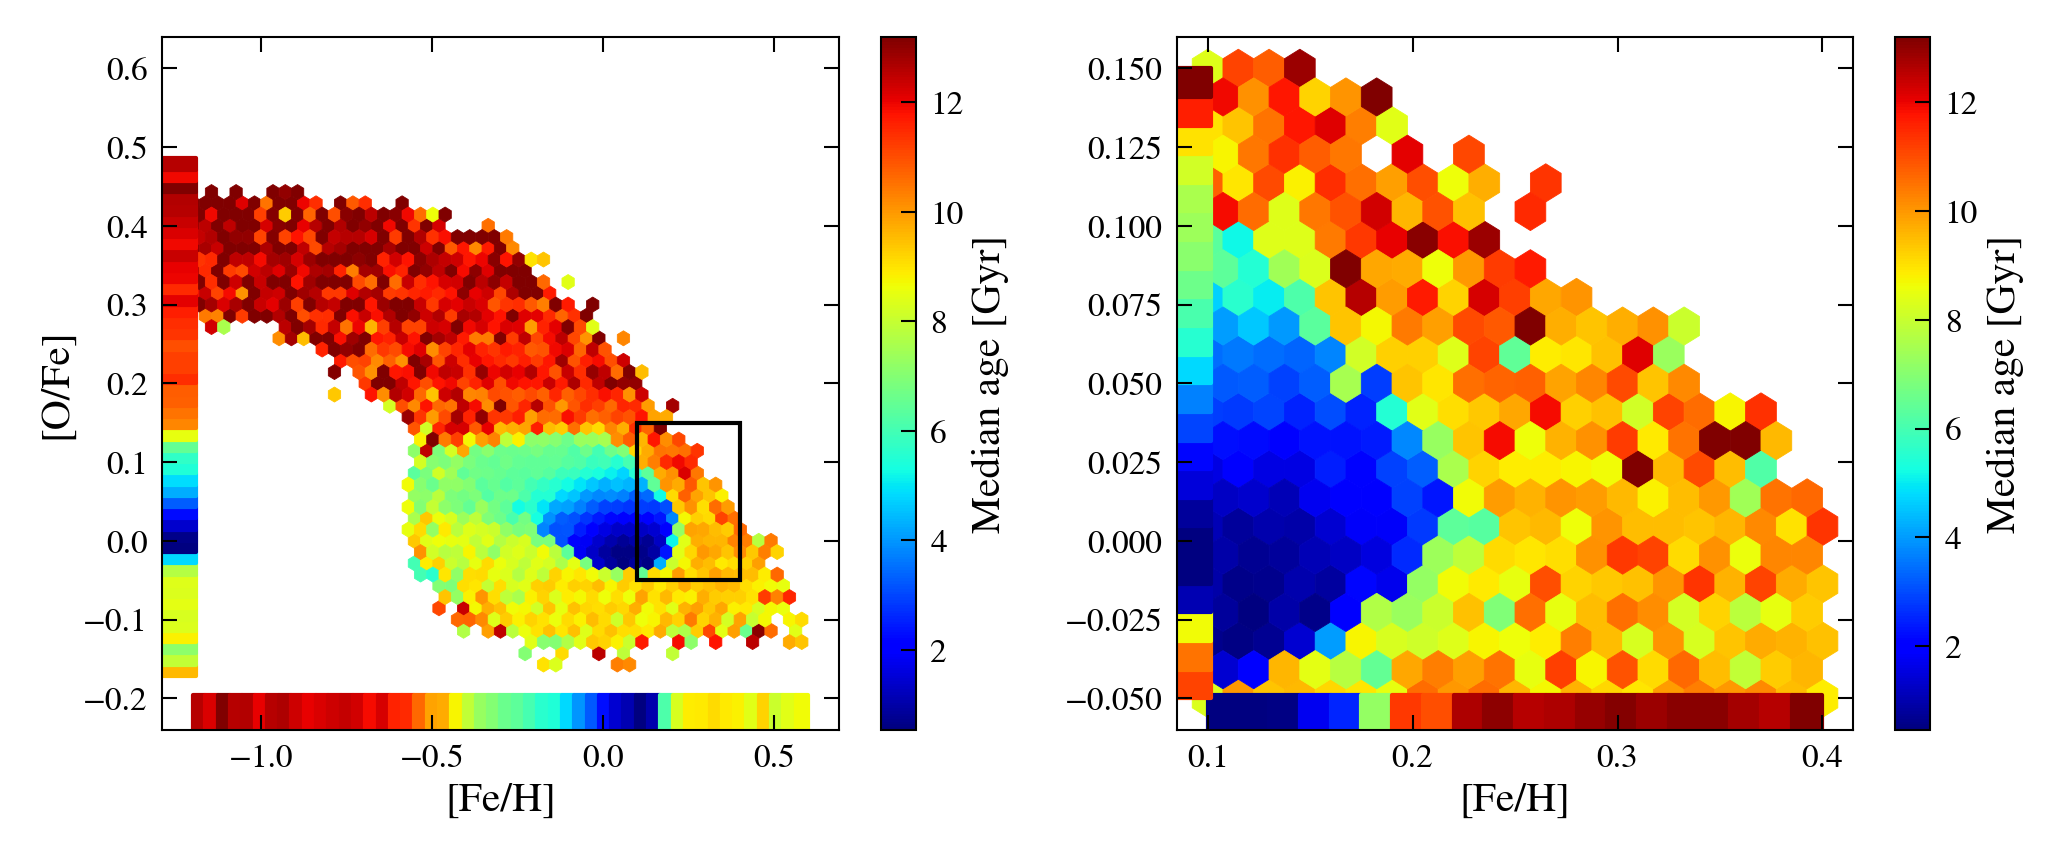

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
cmap = 'jet'
# Full abundance plot
pcm0 = axs[0].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=mzs_local('age'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.2, 0.6],
    marginals=True,
    vmax=13.2
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Median age [Gyr]')
# Zoom-in
pcm1 = axs[1].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=mzs_local('age'),
    reduce_C_function=np.median,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True,
    vmax=13.2
)
# pc1 = axs[1].scatter(
#     local_sample('FE_H'), local_sample('O_FE'),
#     c=local_sample('L23_AGE'),
#     vmax=9,
#     s=10, marker='.', cmap=cmap
# )
# axs[1].set_xlim((0.2, 0.5))
# axs[1].set_ylim((-0.05, 0.15))
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Median age [Gyr]')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

See also Spitoni et al. (2024), figure 11

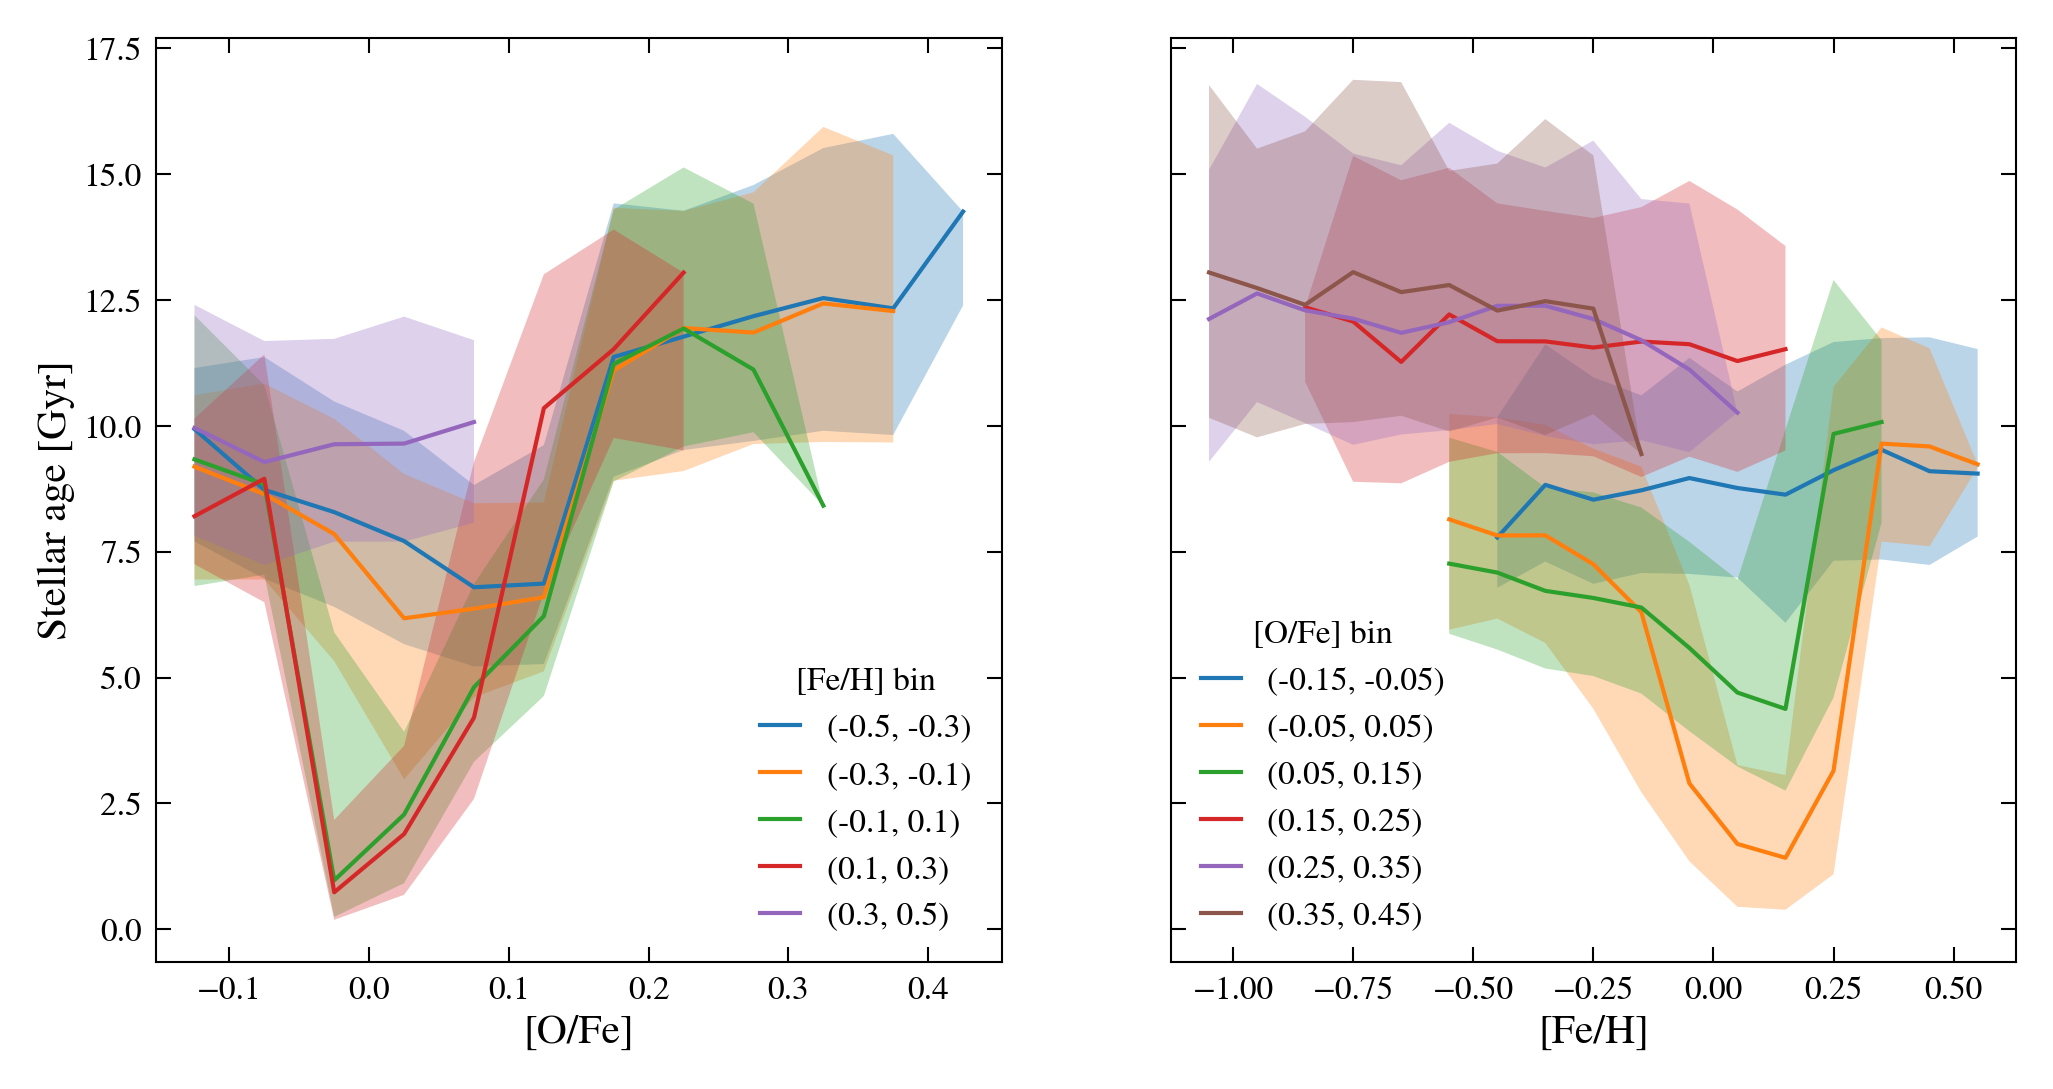

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
oh_bins = np.arange(-0.5, 0.51, 0.2)
ofe_bins = np.arange(-0.15, 0.5, 0.05)
min_frac = 0.01 # threshold number of counts per bin for plotting
for i in range(len(oh_bins)-1):
    oh_lim = tuple(oh_bins[i:i+2])
    mono_z_pop = mzs_local.filter({'[fe/h]': oh_lim})
    age_intervals = mono_z_pop.binned_intervals('age', '[o/fe]', ofe_bins)
    # age_intervals[age_intervals['mass_fraction'] < min_frac] = np.nan
    axs[0].fill_between(get_bin_centers(ofe_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    axs[0].plot(get_bin_centers(ofe_bins), age_intervals[0.5], 
            label=f'({round(oh_lim[0], 2)}, {round(oh_lim[1], 2)})')
# plot age vs [fe/h] in bins of [o/fe]
oh_bins = np.arange(-1.1, 0.7, 0.1)
ofe_bins = np.arange(-0.15, 0.5, 0.1)
for i in range(len(ofe_bins)-1):
    ofe_lim = tuple(ofe_bins[i:i+2])
    mono_z_pop = mzs_local.filter({'[o/fe]': ofe_lim})
    age_intervals = mono_z_pop.binned_intervals('age', '[fe/h]', oh_bins)
    # age_intervals[age_intervals['mass_fraction'] < min_frac] = np.nan
    axs[1].fill_between(get_bin_centers(oh_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    axs[1].plot(get_bin_centers(oh_bins), age_intervals[0.5], 
            label=f'({round(ofe_lim[0], 2)}, {round(ofe_lim[1], 2)})')
axs[0].set_xlabel('[O/Fe]')
axs[0].set_ylabel('Stellar age [Gyr]')
axs[0].legend(title='[Fe/H] bin')
axs[1].set_xlabel('[Fe/H]')
axs[1].legend(title='[O/Fe] bin')
plt.show()

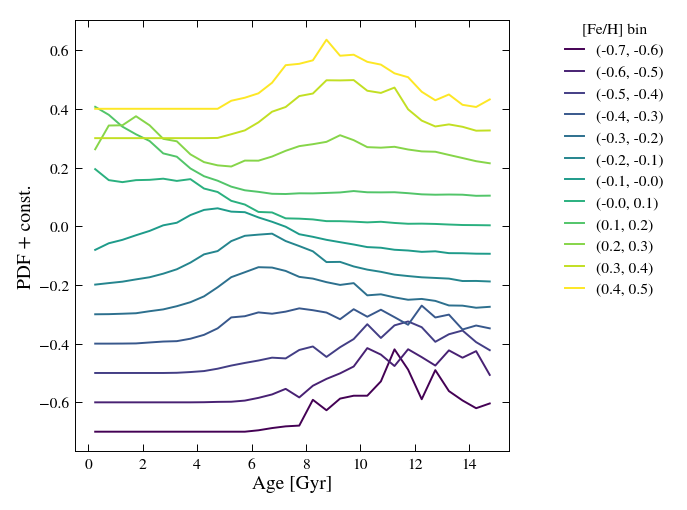

In [16]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
feh_bins = np.arange(-0.7, 0.51, 0.1)
cmap = 'viridis'
colors = get_color_list(plt.get_cmap(cmap), feh_bins)
for i in range(len(feh_bins)-1):
    feh_lim = tuple(feh_bins[i:i+2])
    const = feh_lim[0]
    mono_feh_pop = mzs_local.filter({'[fe/h]': feh_lim})
    adf, age_bins = mono_feh_pop.mdf('age', bins=30, range=(0, 15), smoothing=0.)
    ax.plot(get_bin_centers(age_bins), adf+const, color=colors[i], 
            label=f'({round(feh_lim[0], 2)}, {round(feh_lim[1], 2)})')
fig.legend(loc='upper right', title='[Fe/H] bin', bbox_to_anchor=(1.2, 0.9))
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('PDF + const.')
plt.show()

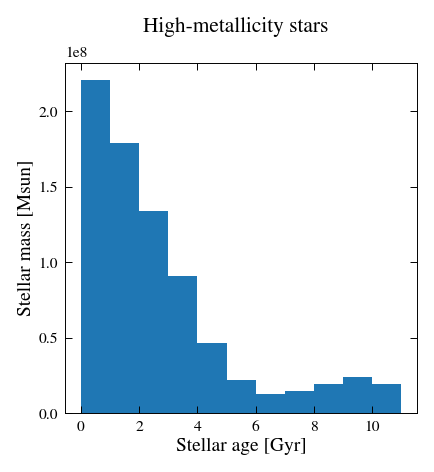

In [17]:
fig, ax = plt.subplots(dpi=140)
local_inset = mzs_local.stars[
    (mzs_local.stars['[fe/h]'] >= inset_extent[0]) &
    (mzs_local.stars['[fe/h]'] < inset_extent[1]) &
    (mzs_local.stars['[o/fe]'] >= inset_extent[2]) &
    (mzs_local.stars['[o/fe]'] < inset_extent[3])
].copy()
ax.hist(local_inset['age'], bins=np.arange(0, 12, 1), weights=local_inset['mstar'])
ax.set_xlabel('Stellar age [Gyr]')
ax.set_ylabel('Stellar mass [Msun]')
fig.suptitle('High-metallicity stars')
plt.show()

## Single-plot comparison

In [18]:
from matplotlib.ticker import MultipleLocator
from scatter_plot_grid import setup_colorbar
from _globals import TWO_COLUMN_WIDTH
from utils import weighted_quantile, kde2D, contour_levels_2D

full_sample = APOGEESample.load()
local_sample = full_sample.region(galr_lim=(7, 9), absz_lim=(0, 2))
mzs = MultizoneStars.from_output('yZ2/best/cgm07_ratio025_eta18_migr36/diskmodel')
mzs.model_uncertainty(full_sample.data, inplace=True)
mzs_local = mzs.region(galr_lim=(7, 9), absz_lim=(0, 2))

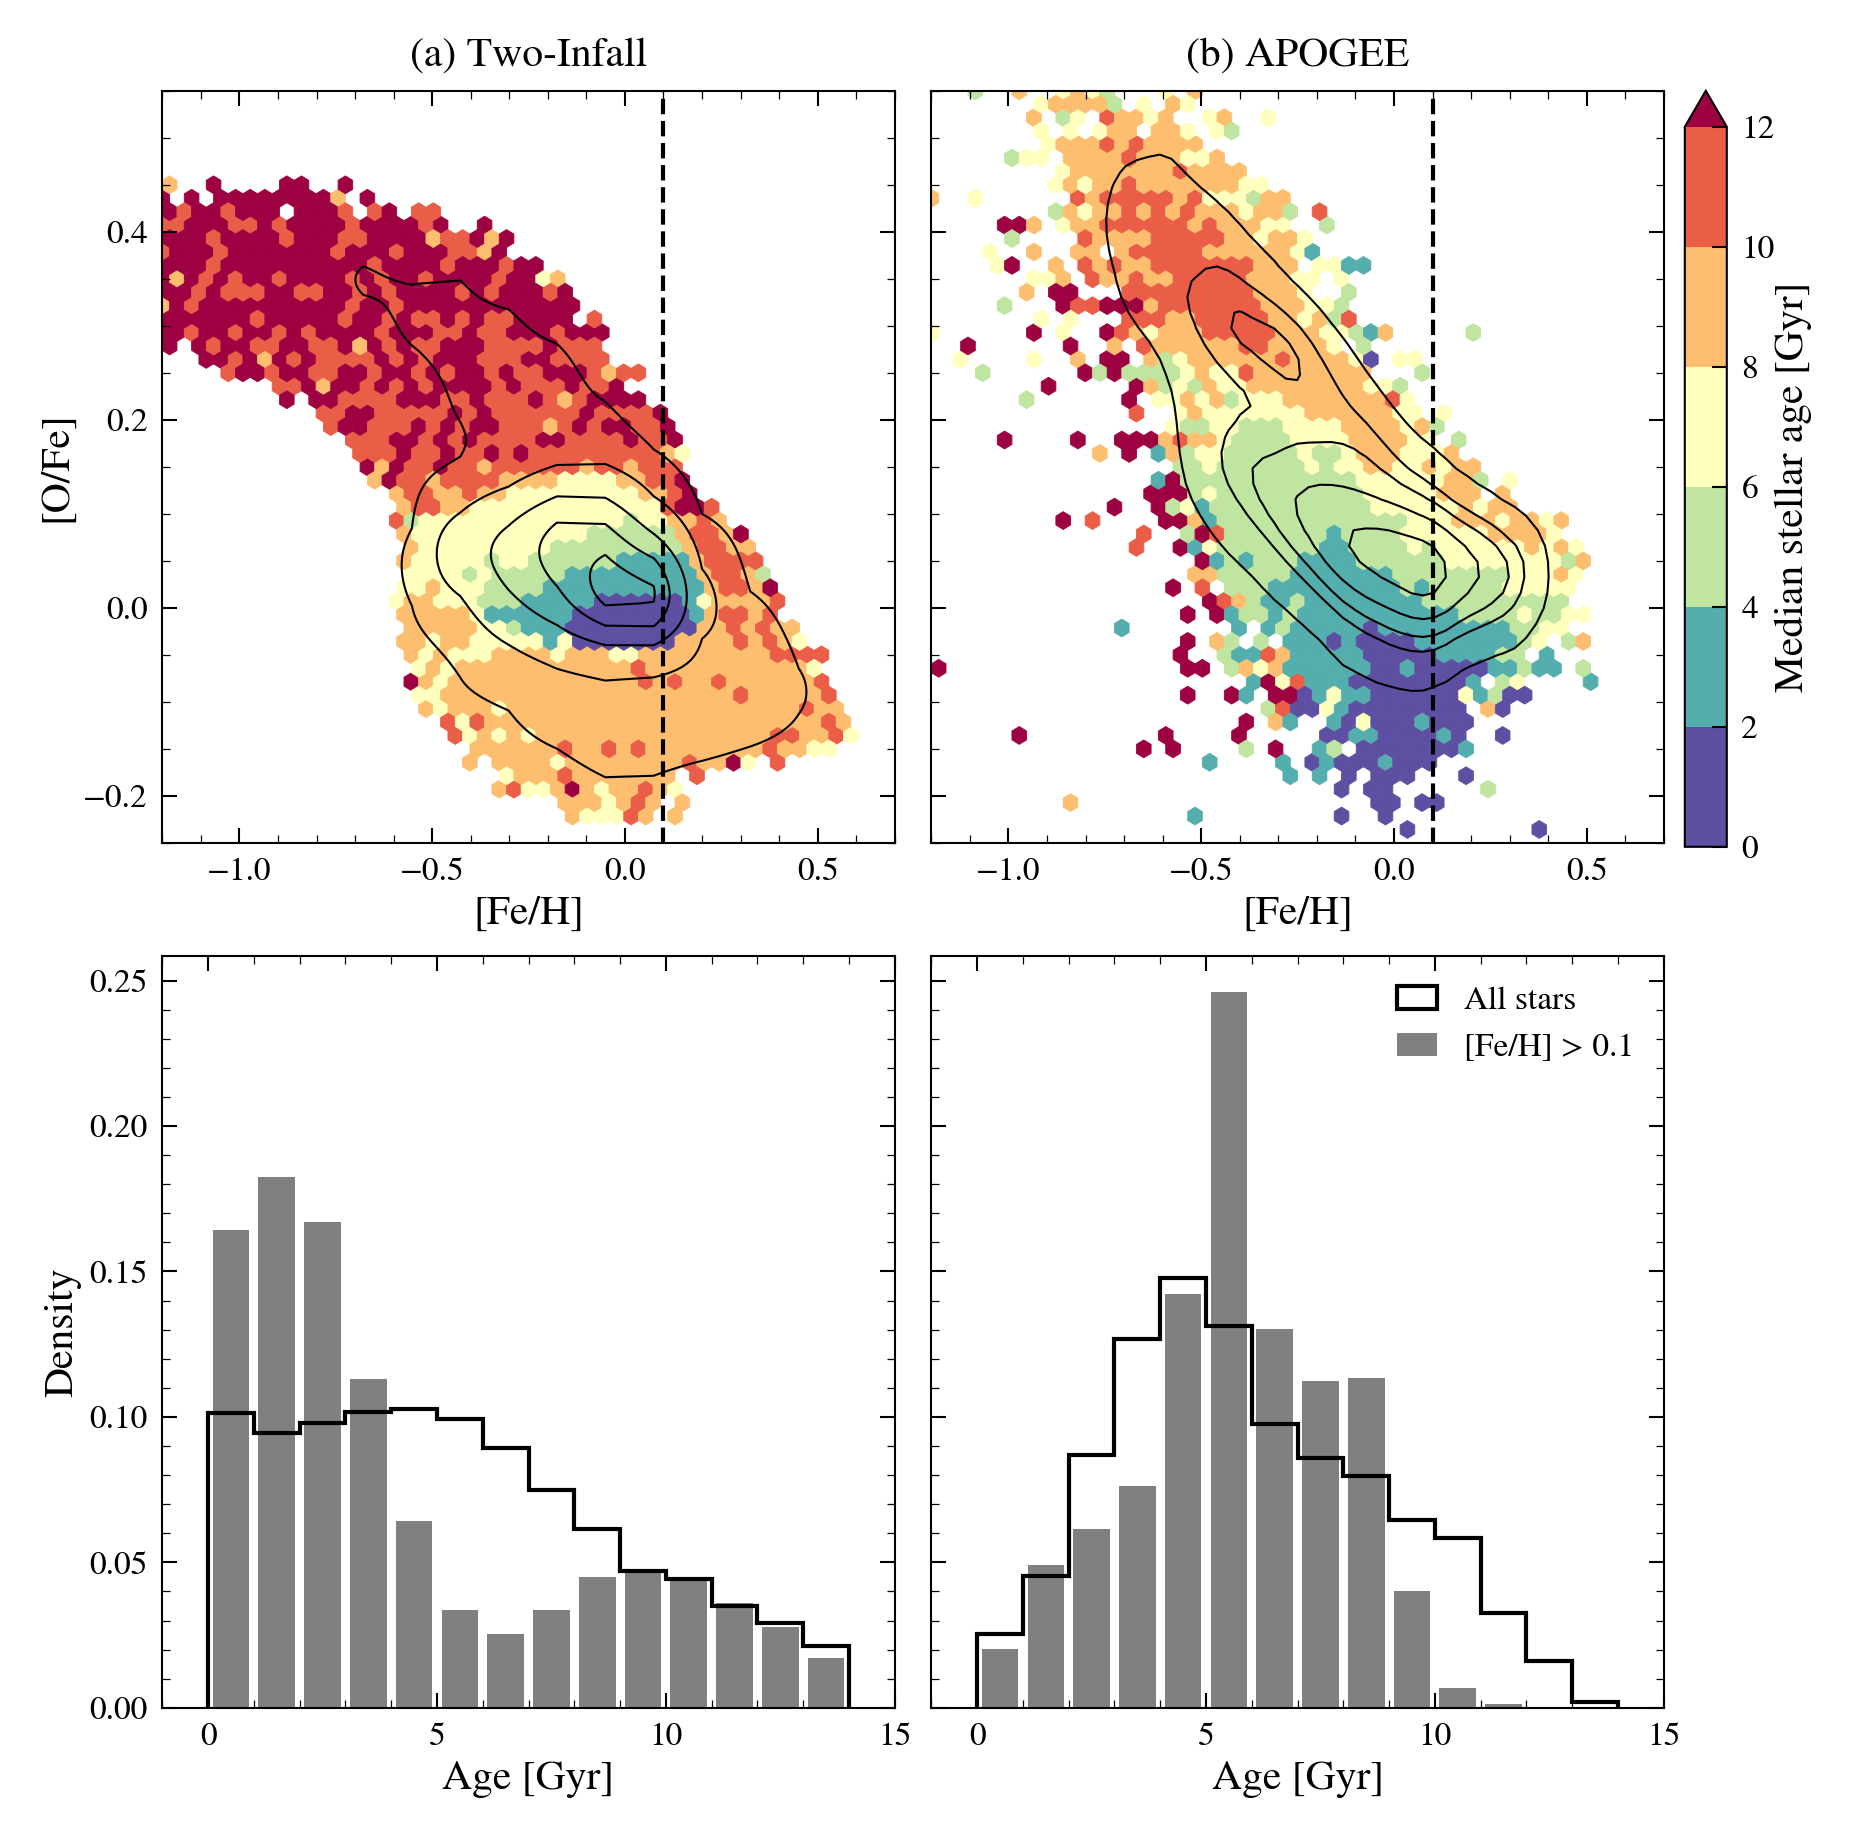

In [41]:
plt.style.use(paths.styles / 'paper.mplstyle')
fig, axs = plt.subplots(2, 2, 
                        figsize=(TWO_COLUMN_WIDTH, TWO_COLUMN_WIDTH), 
                        sharex='row', sharey='row', 
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.15})
full_extent = [-1.2, 0.7, -0.25, 0.55]
contour_levels = [0.9, 0.7, 0.5, 0.3, 0.1]
lmr_cut = 0.1 # boundary for locally metal-rich stars
cmap = 'Spectral_r'
age_bins = np.arange(0, 13.1, 2)
age_col = 'L23_AGE'
cbar = setup_colorbar(fig, cmap=cmap, bounds=age_bins, extend='max',
                      label='Median stellar age [Gyr]', bottom=0.52)
# VICE
# Problem: right now the median age isn't weighted by mass, so a number of
# low-mass populations could skew the result in a bin
axs[0,0].set_title('(a) Two-Infall')
weighted_median = lambda x: np.quantile(x, 0.5, weights=mzs_local('mstar'))
mzs_local.filter({'mstar': (0.1, None)}, inplace=True)
pcm0 = axs[0,0].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=mzs_local('age'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, norm=cbar.norm, linewidths=0.2,
    extent=full_extent,
)
# Plot contour lines
bandwidth = 0.03
xx, yy, logz = kde2D(mzs_local.stars['[fe/h]'], mzs_local.stars['[o/fe]'], 
                     bandwidth, xbins=200j, ybins=200j)
scaled_density = np.exp(logz) / np.max(np.exp(logz))
levels = contour_levels_2D(scaled_density, enclosed=contour_levels)
axs[0,0].contour(xx, yy, scaled_density, levels, colors='k',
            linewidths=0.5, linestyles='-')
axs[0,0].axvline(lmr_cut, ls='--', c='k')
# APOGEE
axs[0,1].set_title('(b) APOGEE')
pcm1 = axs[0,1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample(age_col),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, norm=cbar.norm, linewidths=0.2,
    extent=full_extent,
)
local_sample.plot_kde2D_contours(axs[0,1], 'FE_H', 'O_FE',
                                 c='k', lw=0.5, ls='-', 
                                 enclosed=contour_levels,
                                 bandwidth=bandwidth
                                 )
axs[0,1].axvline(lmr_cut, ls='--', c='k')
axs[0,0].set_xlabel('[Fe/H]')
axs[0,1].set_xlabel('[Fe/H]')
axs[0,0].set_ylabel('[O/Fe]')
axs[0,0].xaxis.set_major_locator(MultipleLocator(0.5))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.1))
axs[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
axs[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
axs[0,0].set_xlim(full_extent[:2])
axs[0,0].set_ylim(full_extent[2:])

# Age distributions
age_bins = np.arange(0, 14.1, 1)
# VICE
axs[1,0].hist(mzs_local('age'), bins=age_bins, weights=mzs_local('mstar'), 
              density=True, label='All stars',
              histtype='step', color='k', ls='-',)
mzs_lmr = mzs_local.filter({'[fe/h]': (lmr_cut, None)})
axs[1,0].hist(mzs_lmr('age'), bins=age_bins, weights=mzs_lmr('mstar'), 
              density=True, 
              label='[Fe/H] > %s' % lmr_cut,
              histtype='bar', color='gray', rwidth=0.8,)
# axs[1,0].legend()
# APOGEE
axs[1,1].hist(local_sample(age_col), bins=age_bins, 
              density=True, label='All stars', 
              histtype='step', color='k', ls='-',)
apogee_lmr = local_sample.filter({'FE_H': (lmr_cut, None)})
axs[1,1].hist(apogee_lmr(age_col), bins=age_bins, 
              density=True, label='[Fe/H] > %s' % lmr_cut,
              histtype='bar', color='gray', rwidth=0.8,)
axs[1,1].legend()
axs[1,0].set_xlabel('Age [Gyr]')
axs[1,1].set_xlabel('Age [Gyr]')
axs[1,0].xaxis.set_major_locator(MultipleLocator(5))
axs[1,0].xaxis.set_minor_locator(MultipleLocator(1))
axs[1,0].yaxis.set_major_locator(MultipleLocator(0.05))
axs[1,0].yaxis.set_minor_locator(MultipleLocator(0.01))
axs[1,0].set_xlim((-1, 15))
axs[1,0].set_ylabel('Density')
plt.show()